# <center> <u> Network Theory 2024 Projektityö </u> </center>

## <center> Bianconi-Barabasi malli</center>

In [1]:
# paketit

# import networkx as nx
# import multiprocess as mltp
import matplotlib.pyplot as plt
import numpy as np # numpy importataan myös osana alla olevaa bbModelWrap moduulia, mutta tekstieditoreiden koodi analyysit eivät tätä huomaa
from BianconiBarabasiModel import bbModelWrap as BB

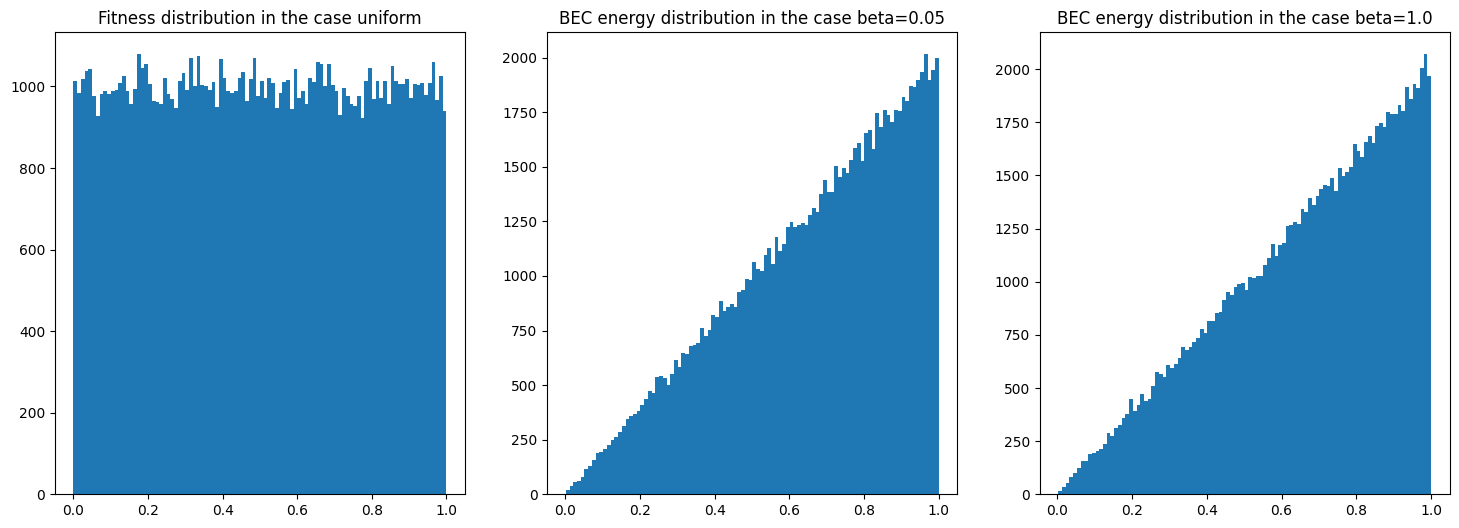

In [2]:
# testataan omaa funktiota ja nähdään kosahtaako kaikki
test_cases = [(1, "uniform"), (0.05, "BEC"), (1.0, "BEC")]

fig, axes = plt.subplots(1, 3, figsize=(18,6))
plot_index = 0
for case in test_cases:
    test_dict, test_edge = BB.generateBianconiBarabasi(100000, 2, case[0], case[1])
    test_fitns = list(test_dict.values())
    if (case[1] != "uniform"):
        test_nrgs = [-np.log(val) / case[0] for val in test_fitns]
        axes[plot_index].hist(test_nrgs, bins=100)
        axes[plot_index].title.set_text(f"{case[1]} energy distribution in the case beta={case[0]}")
    else:
        axes[plot_index].hist(test_fitns, bins=100)
        axes[plot_index].title.set_text(f"Fitness distribution in the case {case[1]}")
    plot_index += 1
plt.show()

In [3]:
_, _ = BB.generateBianconiBarabasi(1000000, 2, 2.0, "BEC")

In [8]:
_, _ = BB.generateBianconiBarabasi(1000000, 2, distr_type="uniform")

In [5]:
# energies = []
# for key in fit_dict:
#     energies.append(-np.log(fit_dict[key])/1.0)

# fig, axes = plt.subplots(figsize=(6,5))
# plt.hist(energies, bins=100)
# plt.show()

In [6]:
# degree_total = sum([uniform_graph.degree(n) for n in uniform_graph.nodes()])
# degree_freq = [val / degree_total for val in nx.degree_histogram(uniform_graph)]
# degree_vals = [i for i in range(len(degree_freq))]
# plt.scatter(degree_vals, degree_freq, alpha=0.8)
# plt.yscale('log')
# plt.xscale('log')
# plt.tight_layout()
# plt.show()